In [3]:
import temul.polarisation as tmlp
from temul.signal_plotting import compare_images_line_profile_one_image
import atomap.api as am
import hyperspy.api as hs
import numpy as np
import os

if "data" not in os.path.abspath(''):
    path_to_data = os.path.join(os.path.abspath(''), "data")
    os.chdir(path_to_data)


In [ ]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


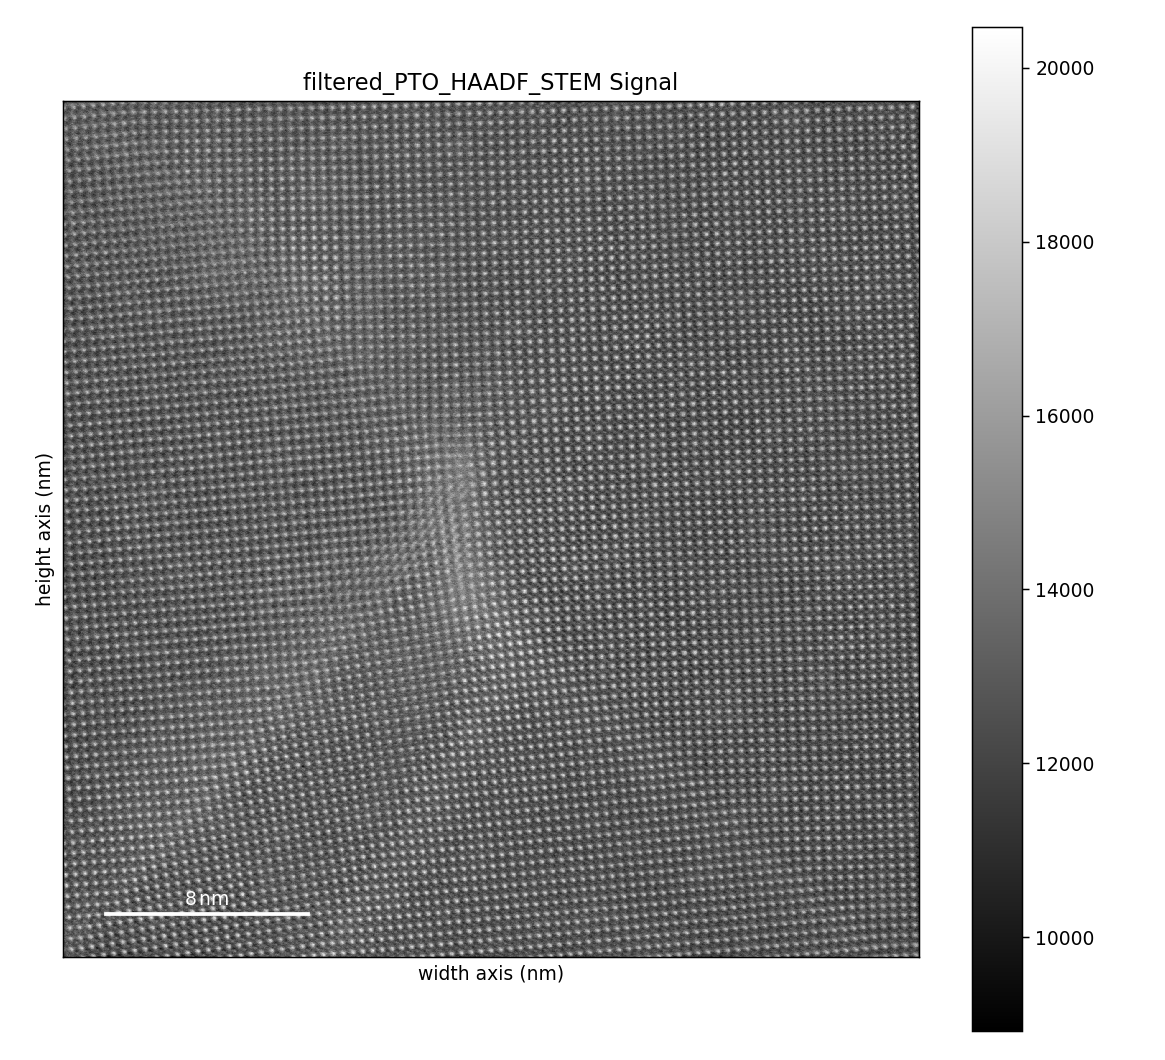

In [4]:
# Open the original PTO Junction dataset

image = hs.load("filtered_PTO_HAADF_STEM.hspy")
sampling = image.axes_manager[-1].scale  # nm/pix
units = image.axes_manager[-1].units
image.plot()


In [ ]:
# Open the pre-made PTO atom lattice. This may take a while.

atom_lattice = am.load_atom_lattice_from_hdf5("Atom_Lattice.hdf5", False)
sublattice1 = atom_lattice.sublattice_list[0]  # Pb Sublattice
sublattice2 = atom_lattice.sublattice_list[1]  # Ti Sublattice
sublattice1.construct_zone_axes(atom_plane_tolerance=1)


In [7]:
# Set up parameters for plotting the strain, rotation, and c/a ratio maps:
zone_vector_index_A = 0
zone_vector_index_B = 1
# Note that sometimes the 0 and 1 axes are constructed first or second, so you may have to swap them.

filename = None  # Set to a string if you want to save the map

You can use return_x_y_z=True to get the x,y, and strain/rotation/ratio
values also!
Check the documentation here: temul-toolkit.readthedocs.io


In [9]:
'''
Plot the line profiles with temul.signal_plotting functions
You can also choose your own line_profile_positions with
am.add_atoms_with_gui(image) and use the skimage.profile_line for
customisability.
'''

line_profile_positions = np.load('line_profile_positions.npy')


In [10]:
# We want to see the strain map of the Pb Sublattice in the y-axis direction

vmin = -15
vmax = 30
cmap = 'inferno'
theoretical_value = round(3.929/10, 3)  # units of nm

strain_map = tmlp.get_strain_map(sublattice1, zone_vector_index_A,
                                 theoretical_value, sampling=sampling,
                                 units=units, vmin=vmin, vmax=vmax, cmap=cmap)


In [11]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

compare_images_line_profile_one_image(strain_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)


In [12]:
# Now plot the rotation map of the Pb Sublattice in the x-axis direction to see
# the turning of the lattice across the junction.

vmin = -5
vmax = 15
cmap = 'inferno'
angle_offset = -2  # degrees


In [15]:
# Now plot the rotation map of the Pb Sublattice in the x-axis direction to see
# the turning of the lattice across the junction.

vmin = -5
vmax = 15
cmap = 'inferno'
angle_offset = -2  # degrees

rotation_map = tmlp.rotation_of_atom_planes(
                    sublattice1, zone_vector_index_A,
                    angle_offset, degrees=True, sampling=sampling, units=units,
                    vmin=vmin, vmax=vmax, cmap=cmap)


In [16]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

compare_images_line_profile_one_image(rotation_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)


In [17]:
# Now plot the c/a ratio map of the Pb Sublattice

vmin = 1
vmax = 1.15
cmap = 'inferno'
ideal_ratio_one = True  # values under 1 will be divided by themselves

ca_ratio_map = tmlp.ratio_of_lattice_spacings(
                    sublattice1, zone_vector_index_B,
                    zone_vector_index_A, ideal_ratio_one, sampling=sampling,
                    units=units, vmin=vmin, vmax=vmax, cmap=cmap)


In [18]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

compare_images_line_profile_one_image(ca_ratio_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)
